In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
df = pd.read_csv('filtered_USA_angel_list.txt',sep=',')
df.head()

,Unnamed: 0,name,desc,website,location,employees,raised,angel_url,angel_id
0,1,Cleargraph,Zero-friction identity verification,https://angel.co/cleargraphinc,San Francisco,1-10,-,https://cleargraph.com/careers.html,3405248
1,3,Kylie.ai,Kylie Leverages AI to Clone Enterprise Support...,https://angel.co/kylieai,San Francisco,1-10,-,http://www.kylie.ai,3399236
2,5,IFTTT,Do more with the services you love,https://angel.co/ifttt,San Francisco,11-50,"$37,000,000",https://ifttt.com,26564
3,8,CrowdFlower,The essential human-in-the-loop platform for d...,https://angel.co/crowdflower,San Francisco,51-200,"$38,000,000",http://www.crowdflower.com,32119
4,9,Ripple,"Instant, certain, low-cost cross-border payments.",https://angel.co/ripple-labs,San Francisco,51-200,"$86,500,000",http://www.ripple.com,197974


Let us first drop the column named "Unnamed: 0" which won't contribute anything to the information that we need for the startup success.

In [150]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,name,desc,website,location,employees,raised,angel_url,angel_id
0,Cleargraph,Zero-friction identity verification,https://angel.co/cleargraphinc,San Francisco,1-10,-,https://cleargraph.com/careers.html,3405248
1,Kylie.ai,Kylie Leverages AI to Clone Enterprise Support...,https://angel.co/kylieai,San Francisco,1-10,-,http://www.kylie.ai,3399236
2,IFTTT,Do more with the services you love,https://angel.co/ifttt,San Francisco,11-50,"$37,000,000",https://ifttt.com,26564
3,CrowdFlower,The essential human-in-the-loop platform for d...,https://angel.co/crowdflower,San Francisco,51-200,"$38,000,000",http://www.crowdflower.com,32119
4,Ripple,"Instant, certain, low-cost cross-border payments.",https://angel.co/ripple-labs,San Francisco,51-200,"$86,500,000",http://www.ripple.com,197974


## Column Description :-

1. Name :- Name of the Startup


2. Description :- Description of the Startup


3. Website :- Website of the startup


4. Location :- Location of the Startup


5. Employees :- Number of employees in the startup (This is mentioned as a range in the data)


6. Raised :- Investments raised by the Startup


7. angel_url :-  The link to the startup listed in Angel Website


8. angel_id :- ID of the startup as mentioned in Angel Website

## General Overview of the Dataset

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       681 non-null    object
 1   desc       681 non-null    object
 2   website    681 non-null    object
 3   location   681 non-null    object
 4   employees  669 non-null    object
 5   raised     681 non-null    object
 6   angel_url  678 non-null    object
 7   angel_id   681 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 42.7+ KB


1. Since most of the columns are of the type object, it is possible that we need to check for their unique values inorder to find the missing data


2. Let us first deal with the nan values and then look for each column for missing data

In [152]:
df.shape

(681, 8)

Dataset contains the data of 681 companies located in USA

## Let us now clean the dataset

In [153]:
df.isnull().sum()

name          0
desc          0
website       0
location      0
employees    12
raised        0
angel_url     3
angel_id      0
dtype: int64

In [154]:
df['employees'].value_counts()

11-50        293
1-10         190
51-200       107
-             32
201-500       31
501-1000      11
1001-5000      5
Name: employees, dtype: int64

As we can seefrom above, 32 entries have the value of "-" in employees column so let's take a look at those values to look deeper

In [155]:
df.loc[df['employees']=='-']

,name,desc,website,location,employees,raised,angel_url,angel_id
20,IfOnly,-,https://angel.co/ifonly,San Francisco,-,"$25,300,000",http://www.ifonly.com,285639
25,Yogome,Learning Games Platform for Kids,https://angel.co/yogome,San Francisco,-,-,http://yogome.com,58611
47,Fitbit,-,https://angel.co/fitbit,San Francisco,-,"$66,000,000",http://www.fitbit.com,32178
88,Grow Mobile,A single mobile ad buying solution across netw...,https://angel.co/grow-mobile,San Francisco,-,"$43,000,000",http://www.growmobile.com,117240
237,IfOnly,-,https://angel.co/ifonly,San Francisco,-,"$25,300,000",http://www.ifonly.com,285639
242,Yogome,Learning Games Platform for Kids,https://angel.co/yogome,San Francisco,-,-,http://yogome.com,58611
263,Fitbit,-,https://angel.co/fitbit,San Francisco,-,"$66,000,000",http://www.fitbit.com,32178
303,Grow Mobile,A single mobile ad buying solution across netw...,https://angel.co/grow-mobile,San Francisco,-,"$43,000,000",http://www.growmobile.com,117240
332,StrikeAd,-,https://angel.co/strikead,New York City,-,"$7,003,898",http://www.strikead.com,103776
333,Aereo,-,https://angel.co/aereo,New York City,-,"$97,000,000",http://aereo.com/home,104495


Looking at the rows of 674 and 675 we seem to have duplicated data in the dataset

In [156]:
df.duplicated().value_counts()

False    470
True     211
dtype: int64

It seems approximately 30% of the data is duplicated. Lets look at some entries to see if everything in them is duplicated

In [157]:
df.loc[df.duplicated()]

,name,desc,website,location,employees,raised,angel_url,angel_id
138,Cleargraph,Zero-friction identity verification,https://angel.co/cleargraphinc,San Francisco,1-10,-,https://cleargraph.com/careers.html,3405248
139,Kylie.ai,Kylie Leverages AI to Clone Enterprise Support...,https://angel.co/kylieai,San Francisco,1-10,-,http://www.kylie.ai,3399236
141,TrendMD,Knowledge discovery for doctors,https://angel.co/trendmd,San Francisco,11-50,-,https://www.trendmd.com/,112410
169,Zendrive,Making roads safer with data and analytics.,https://angel.co/zendrive,San Francisco,11-50,"$16,500,000",http://www.zendrive.com,161392
170,Polymorph,Machine learning driven revenue intelligence p...,https://angel.co/polymorphlabs,San Francisco,11-50,"$10,500,000",http://www.getpolymorph.com,125045
...,...,...,...,...,...,...,...,...
649,Vine Street Ventures,Vine Street Ventures is a fund dedicated to in...,https://angel.co/vine-street-ventures,Cincinnati,1-10,-,http://www.vinestventures.com,116493
651,Tugboat Yards,"Tools to help grow, manage, monetize and retai...",https://angel.co/tugboat-yards,Half Moon Bay,1-10,-,https://tugboatyards.com,113598
675,The Kive Company,Using technology to make parent's lives easier...,https://angel.co/the-kive-company,Encino,-,"$775,000",http://www.artkiveapp.com,117384
677,RiskIQ,RiskIQ is the leader in digital threat management,https://angel.co/riskiq,Shawnee,51-200,"$65,500,000",http://www.riskiq.com/,32396


In [158]:
#Lets look for the company called "Variable"

df.loc[df['name']=='Variable']

,name,desc,website,location,employees,raised,angel_url,angel_id
678,Variable,Professional IoT Platform,https://angel.co/variable,Chattanooga,11-50,"$3,250,000",http://www.variableinc.com,102830
680,Variable,Professional IoT Platform,https://angel.co/variable,Chattanooga,11-50,"$3,250,000",http://www.variableinc.com,102830


Literally everything is duplicated in these entries so lets remove these duplicated values

In [159]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,name,desc,website,location,employees,raised,angel_url,angel_id
0,Cleargraph,Zero-friction identity verification,https://angel.co/cleargraphinc,San Francisco,1-10,-,https://cleargraph.com/careers.html,3405248
1,Kylie.ai,Kylie Leverages AI to Clone Enterprise Support...,https://angel.co/kylieai,San Francisco,1-10,-,http://www.kylie.ai,3399236
2,IFTTT,Do more with the services you love,https://angel.co/ifttt,San Francisco,11-50,"$37,000,000",https://ifttt.com,26564
3,CrowdFlower,The essential human-in-the-loop platform for d...,https://angel.co/crowdflower,San Francisco,51-200,"$38,000,000",http://www.crowdflower.com,32119
4,Ripple,"Instant, certain, low-cost cross-border payments.",https://angel.co/ripple-labs,San Francisco,51-200,"$86,500,000",http://www.ripple.com,197974


In [160]:
df.duplicated().sum()

0

## Success!! We have removed the duplicated values

In [161]:
#Lets check for the company "Variable" again

df.loc[df['name']=='Variable']

,name,desc,website,location,employees,raised,angel_url,angel_id
678,Variable,Professional IoT Platform,https://angel.co/variable,Chattanooga,11-50,"$3,250,000",http://www.variableinc.com,102830


## Let's continue with the cleaning

In [162]:
df.isnull().sum()

name         0
desc         0
website      0
location     0
employees    9
raised       0
angel_url    2
angel_id     0
dtype: int64

We can see that some of the null values are removed by removing duplicates

In [163]:
df.loc[df['employees']=='-']

,name,desc,website,location,employees,raised,angel_url,angel_id
20,IfOnly,-,https://angel.co/ifonly,San Francisco,-,"$25,300,000",http://www.ifonly.com,285639
25,Yogome,Learning Games Platform for Kids,https://angel.co/yogome,San Francisco,-,-,http://yogome.com,58611
47,Fitbit,-,https://angel.co/fitbit,San Francisco,-,"$66,000,000",http://www.fitbit.com,32178
88,Grow Mobile,A single mobile ad buying solution across netw...,https://angel.co/grow-mobile,San Francisco,-,"$43,000,000",http://www.growmobile.com,117240
332,StrikeAd,-,https://angel.co/strikead,New York City,-,"$7,003,898",http://www.strikead.com,103776
333,Aereo,-,https://angel.co/aereo,New York City,-,"$97,000,000",http://aereo.com/home,104495
335,Tiger Global,International private equity investor,https://angel.co/tiger-global,New York City,-,-,http://www.tiger-global.co.uk/,109357
412,MicroEval,Modern Performance Reviews,https://angel.co/microeval,Palo Alto,-,-,http://microeval.com,114442
453,SpaceCurve,-,https://angel.co/spacecurve,Seattle,-,"$12,300,000",http://www.spacecurve.com,150512
470,Pure Storage,-,https://angel.co/pure-storage,Mountain View,-,"$534,856,500",http://www.purestorage.com/,68615


## Since there are less entries, I will manually check for the companies and find their number of employees

1. IfOnly :- This company got merged into the company of "MasterCard" and it's employees are from 51-200 as in Angel so let's impute this value

In [164]:
df.iloc[20]

name                          IfOnly
desc                               -
website      https://angel.co/ifonly
location               San Francisco
employees                          -
raised                   $25,300,000
angel_url      http://www.ifonly.com
angel_id                      285639
Name: 20, dtype: object

In [165]:
df.loc[20,'desc'] = 'IfOnly delivers extraordinary experiences with top talent in sports, music, entertainment, food, wine, golf, tennis and more, all while benefiting deserving non-profits.'
df.loc[20,'employees'] = '51-200'

In [166]:
df.iloc[20]

name                                                    IfOnly
desc         IfOnly delivers extraordinary experiences with...
website                                https://angel.co/ifonly
location                                         San Francisco
employees                                               51-200
raised                                             $25,300,000
angel_url                                http://www.ifonly.com
angel_id                                                285639
Name: 20, dtype: object

2. Yogome :- It is Gaming-based learning platform for kids and has employees from 1-10 according to Angel

In [167]:
df.iloc[25]

name                                   Yogome
desc         Learning Games Platform for Kids
website               https://angel.co/yogome
location                        San Francisco
employees                                   -
raised                                      -
angel_url                   http://yogome.com
angel_id                                58611
Name: 25, dtype: object

In [168]:
df.loc[25,'employees'] = '1-10'
df.loc[25,'raised'] = '$36,500,000'

In [169]:
df.iloc[25]

name                                   Yogome
desc         Learning Games Platform for Kids
website               https://angel.co/yogome
location                        San Francisco
employees                                1-10
raised                            $36,500,000
angel_url                   http://yogome.com
angel_id                                58611
Name: 25, dtype: object

3. Fitbit 

In [170]:
df.iloc[47]

name                          Fitbit
desc                               -
website      https://angel.co/fitbit
location               San Francisco
employees                          -
raised                   $66,000,000
angel_url      http://www.fitbit.com
angel_id                       32178
Name: 47, dtype: object

In [171]:
df.loc[47,'desc'] = 'we are a company dedicated to providing clients with life-changing health and fitness products. We offer a large assortment of smartwatches, scales, apparel, apps, fitness trackers, how-to videos, accessories, and a wide assortment of other tools to help people attain their wellness goals.'
df.loc[47,'employees'] = '1001-5000'

In [172]:
df.head()

,name,desc,website,location,employees,raised,angel_url,angel_id
0,Cleargraph,Zero-friction identity verification,https://angel.co/cleargraphinc,San Francisco,1-10,-,https://cleargraph.com/careers.html,3405248
1,Kylie.ai,Kylie Leverages AI to Clone Enterprise Support...,https://angel.co/kylieai,San Francisco,1-10,-,http://www.kylie.ai,3399236
2,IFTTT,Do more with the services you love,https://angel.co/ifttt,San Francisco,11-50,"$37,000,000",https://ifttt.com,26564
3,CrowdFlower,The essential human-in-the-loop platform for d...,https://angel.co/crowdflower,San Francisco,51-200,"$38,000,000",http://www.crowdflower.com,32119
4,Ripple,"Instant, certain, low-cost cross-border payments.",https://angel.co/ripple-labs,San Francisco,51-200,"$86,500,000",http://www.ripple.com,197974


In [173]:
df['desc'].value_counts()

-                                                                                     25
Launching soon on the app store                                                        1
Bringing transparency to consumer credit.                                              1
Learning Games Platform for Kids                                                       1
Accept EMV chip card payments in any mobile app                                        1
                                                                                      ..
Instant Gratification - Revolutionizing rewards programs (no more points fatigue)      1
Share products you use at work, explore what others are using                          1
Challenging the status quo of workplace technology.                                    1
Early & Growth-stage VC                                                                1
Investing in early stage software companies that are changing the world.               1
Name: desc, Length: 4

In [174]:
df.loc[df['desc']=='-']

,name,desc,website,location,employees,raised,angel_url,angel_id
37,Unity Technologies,-,https://angel.co/unity-technologies,San Francisco,1001-5000,"$17,500,000",http://unity3d.com,38445
110,Sumazi,-,https://angel.co/sumazi,San Francisco,1-10,-,http://www.Sumazi.com,125092
142,Practice Fusion,-,https://angel.co/practice-fusion,San Francisco,201-500,"$240,019,998",http://www.practicefusion.com/,33091
149,Blend,-,https://angel.co/blend,San Francisco,51-200,"$160,000,000",http://blend.com,91411
155,Demandbase,-,https://angel.co/demandbase,San Francisco,201-500,"$78,000,000",http://www.demandbase.com,32132
210,Huckleberry Insurance,-,https://angel.co/huckleberry-insurance,San Francisco,1-10,-,https://www.huckleberry.co,4140151
332,StrikeAd,-,https://angel.co/strikead,New York City,-,"$7,003,898",http://www.strikead.com,103776
333,Aereo,-,https://angel.co/aereo,New York City,-,"$97,000,000",http://aereo.com/home,104495
349,Rearden Capital Management,-,https://angel.co/rearden-capital-management-1,New York City,1-10,-,http://reardencapital.com/,159119
351,New York Angels,-,https://angel.co/new-york-angels,New York City,1-10,-,http://newyorkangels.com,167393


In [175]:
df.loc[37,'desc'] = 'Unity is the world’s leading platform for creating and operating real-time 3D (RT3D) content. Creators, ranging from game developers to artists, architects, automotive designers, filmmakers, and others, use Unity to make their imaginations come to life'
df.loc[110,'desc'] = 'Sumazi was a social media and social intelligence platform for enterprises, brands and celebrities. Its technology performs social data analysis across social networking services'
df.loc[142,'desc'] = 'Practice Fusion is a web-based electronic health record (EHR) company based in San Francisco, CA. The company was founded in 2005 by Ryan Howard and acquired by Allscripts in 2018.'
df.loc[149,'desc'] = 'Blend makes the process of getting a loan simple, fast, and safe! With its digital lending platform, Blend helps financial institutions including Wells Fargo and U.S. Bank increase productivity and deliver exceptional customer experiences.'
df.loc[155,'desc'] = 'At Demandbase, we are the leader in Account-Based Marketing (ABM) offering the only comprehensive AI-enabled ABM platform. We are passionately dedicated to helping B2B marketers achieve greater business impact.'
df.loc[210,'desc'] = 'At Huckleberry, we are on a mission to make insurance work for small businesses. Over the past decade, technology has changed the way we run companies—from accounting and tax prep to customer management and payment processing. But small business owners are still forced to buy workers comp, general liability, and property insurance via an offline process that can take weeks to complete.'
df.loc[332,'desc'] = 'StrikeAd Fusion, a proprietary technology platform for agencies and advertisers to plan, execute, and evaluate their mobile advertisements.'
df.loc[333,'desc'] = 'Aereo was a technology company based in New York City that allowed subscribers to view live and time-shifted streams of over-the-air television on Internet-connected devices.'
df.loc[349,'desc'] = 'Rearden Capital Management LLC is a trading and investment firm.'
df.loc[351,'desc'] = 'New York Angels is an organization of seed capital angel investors that provides equity capital for early stage companies, primarily in the field of technology and new media'
df.loc[403,'desc'] = 'HealthTap is the first global virtual health practice, powered by more than 100,000 U.S. doctors, delivering fast, affordable, and quality care through our innovative H.O.P.E.S (Health Operating System).'
df.loc[453,'desc'] = 'SpaceCurve offers a parallel data platform for the Internet of Things that ingests, processes, and analyzes IoT data in real-time.'
df.loc[470,'desc'] = 'Pure Storage was founded with the ambitious goal of revolutionizing the computing infrastructure industry. Today we are building the data platform for the cloud era and we’ve accomplished the first step towards that goal by bringing to market the simplest and most reliable all-flash storage array in history.'
df.loc[494,'desc']  = 'Chegg is a website and mobile app for students – “The Student Hub.” Students on more than 7,000 campuses nationwide use Chegg for textbooks & eTextbooks, Chegg Study (Q&A and Texbook Solutions), tutoring, internships, student deals, scholarships and more.'
df.loc[497,'desc'] = 'Neoteny Co., Ltd is a venture capital firm which specializes in growth capital and incubation investments. The firm considers investments in all stages with a preference for early stage. It seeks to invest in the information technology sector'
df.loc[499,'desc'] = 'Sample6′s mission is to improve the health and safety of global consumers by building integrated systems that quickly and easily detect harmful and unwanted bacteria.'
df.loc[505,'desc'] = 'Raptor Ventures is the venture capital arm of Raptor Capital Management LP. We partner with and deploy capital to early-stage, market disrupting technology and media companies to build the next generation of market leaders.'
df.loc[529,'desc'] = 'Silversheet is revolutionizing how healthcare facilities manage their workforce, and how healthcare professionals manage their own careers.  We have started by tackling a complex and critical part of daily workflow – physician credentialing.'
df.loc[536,'desc'] = 'Kidaptive creates educational software and services. Our signature offering is our Adaptive Learning Platform, which we call ALP. (We are scientists, not marketers.) ALP combines the best of Silicon Valleys big-data expertise with world-class learning science to give meaning to learning-relevant data'
df.loc[544,'desc'] = 'Freedom Financial Network is a family of companies that takes a people-first approach to financial services, using technology to empower consumers to overcome debt and create a brighter financial future.'
df.loc[563,'desc'] = 'PowerReviews works with more than 1,000 global brands and retailers to increase conversion and improve products and the customer experience with ratings and reviews and Q&A software.'
df.loc[615,'desc'] = 'Peterson Ventures is an early-stage venture capital firm focused on SaaS, digital commerce, and healthcare'
df.loc[616,'desc'] = 'Plumzi partners with world-renowned animation studios to turn their existing TV episodes into appisodes, a new form of entertainment on tablets and smartphones that enables kids to interact with characters and help drive the story via touch, voice, and tilt.'
df.loc[667,'desc'] = 'Drummond Road Capital operates as a venture capital firm. The Company serves customers in the United States.'
df.loc[669,'desc'] = 'Zocdoc is the tech company at the beginning of a better healthcare experience. Each month, millions of patients use Zocdoc to find in-network neighborhood doctors, instantly book appointments online, see what other real patients have to say, get reminders for upcoming appointments and preventive check-ups, fill out their paperwork online, and more. With a mission to give power to the patient, Zocdoc’s online marketplace delivers the accessible, seamless, and simple experience patients expect and deserve.'


In [176]:
df.loc[df['desc']== '-']

,name,desc,website,location,employees,raised,angel_url,angel_id


In [177]:
#Succesfully cleaned the description column

In [178]:
df['website'].isnull().sum()

0

In [179]:
print(len(df),len(df['website'].unique()))

470 470


In [180]:
#No missing values

In [181]:
df['location'].unique()

array(['San Francisco', 'San Francisco Bay Area', 'South San Francisco',
       'Princeton', 'New York City', 'Brooklyn', 'Palo Alto', 'Cambridge',
       'Bellevue', 'Seattle', 'Detroit', 'Mountain View', 'Santa Clara',
       'Boston', 'United States', 'Redwood City', 'San Mateo', 'Miami',
       'Denver', 'Chicago', 'Austin', 'Boulder', 'Los Angeles', 'Houston',
       'Dallas', 'Salt Lake City', 'Silicon Valley', 'Portland',
       'Las Vegas', 'Menlo Park', 'Manhattan Beach', 'Richmond',
       'Washington DC', 'Sunnyvale', 'Charlotte', 'Burlingame',
       'Cincinnati', 'Half Moon Bay', 'San Diego', 'Nashua', 'Somerville',
       'San Antonio', 'Oakland', 'San Jose', 'Emeryville', 'Santa Monica',
       'Atlanta', 'Cleveland', 'Orange County', 'Scottsdale', 'Utah',
       'Lancaster', 'Culver City', 'Stanford', 'Encino', 'Shawnee',
       'Chattanooga'], dtype=object)

In [182]:
df['location'].isnull().sum()

0

In [183]:
#No null values in location


In [184]:
df['employees'].isnull().sum()

9

In [185]:
df.loc[df['employees'].isnull()]

,name,desc,website,location,employees,raised,angel_url,angel_id
65,Instawork,Local jobs marketplace (YC S15),https://angel.co/instawork,San Francisco,NaN,-,http://www.instawork.com,837595
93,Meetings.io,Effortless Video Meetings,https://angel.co/meetings-io,San Francisco,NaN,-,http://meetings.io,111423
146,Yoshi,Never go to the gas station again,https://angel.co/startyoshi,San Francisco,NaN,"$2,100,000",http://www.startyoshi.com,2198156
167,NanoNets,Machine Learning as a Service for Developers,https://angel.co/nanonets,San Francisco,NaN,"$1,620,000",https://nanonets.com,3188382
197,VoiceOps,AI for enterprise voice data,https://angel.co/voiceops,San Francisco,NaN,-,https://voiceops.com,1204390
200,Xendit,Payments infrastructure for South East Asia,https://angel.co/xendit,San Francisco,NaN,-,http://xendit.co,603597
411,Version One Ventures,version one ventures is a seed fund investing ...,https://angel.co/version-one-ventures,Palo Alto,NaN,"$35,000,000",http://www.versionone.vc,106386
546,Roam Analytics,Machine Intelligence for Human Health,https://angel.co/roam-analytics,San Mateo,NaN,"$11,345,000",http://roamanalytics.com,686236
656,yozio,Organic Mobile Growth Platform,https://angel.co/yozio,Oakland,NaN,"$7,000,000",http://www.yozio.com,126698


In [186]:
df.loc[65,'employees'] = '51-200'
df.loc[93,'employees'] = '0'
df.loc[146,'employees'] = '11-50'
df.loc[167,'employees'] = '11-50'
df.loc[197,'employees'] = '11-50'
df.loc[200,'employees'] = '51-200'
df.loc[411,'employees'] = '1-10'
df.loc[546,'employees'] = '11-50'
df.loc[656,'employees'] = '1-10'

In [187]:
df['employees'].isnull().sum()

0

In [188]:
df['employees'].unique()

array(['1-10', '11-50', '51-200', '501-1000', '201-500', '1001-5000', '-',
       '0'], dtype=object)

In [189]:
df.loc[df['employees']=='-']

,name,desc,website,location,employees,raised,angel_url,angel_id
88,Grow Mobile,A single mobile ad buying solution across netw...,https://angel.co/grow-mobile,San Francisco,-,"$43,000,000",http://www.growmobile.com,117240
332,StrikeAd,"StrikeAd Fusion, a proprietary technology plat...",https://angel.co/strikead,New York City,-,"$7,003,898",http://www.strikead.com,103776
333,Aereo,Aereo was a technology company based in New Yo...,https://angel.co/aereo,New York City,-,"$97,000,000",http://aereo.com/home,104495
335,Tiger Global,International private equity investor,https://angel.co/tiger-global,New York City,-,-,http://www.tiger-global.co.uk/,109357
412,MicroEval,Modern Performance Reviews,https://angel.co/microeval,Palo Alto,-,-,http://microeval.com,114442
453,SpaceCurve,SpaceCurve offers a parallel data platform for...,https://angel.co/spacecurve,Seattle,-,"$12,300,000",http://www.spacecurve.com,150512
470,Pure Storage,Pure Storage was founded with the ambitious go...,https://angel.co/pure-storage,Mountain View,-,"$534,856,500",http://www.purestorage.com/,68615
478,Rockmelt,re-imagine the browser,https://angel.co/rockmelt,Mountain View,-,"$39,875,000",http://www.rockmelt.com,100623
480,Hydrazine Capital,Early stage investments,https://angel.co/hydrazine-capital,Mountain View,-,-,-,166597
499,Sample6,Sample6′s mission is to improve the health and...,https://angel.co/sample6,Boston,-,"$29,450,000",http://www.sample6.com,273565


In [190]:
df.loc[88,'employees'] = '51-200'
df.loc[332,'employees'] = '51-200'
df.loc[333,'employees'] ='11-50'
df.loc[335,'employees'] = '1-10'
df.loc[412,'employees'] = '1-10'
df.loc[453,'employees'] = '1-10'
df.loc[470,'employees'] = '1001-5000'
df.loc[478,'employees'] = '11-50'
df.loc[480,'employees'] = '1-10'
df.loc[499,'employees'] = '11-50'
df.loc[505,'employees'] = '51-200'

In [191]:
df.loc[565,'employees'] = '51-200'
df.loc[613,'employees'] = '11-50'
df.loc[653,'employees'] = '51-200'
df.loc[667,'employees'] = '1-10'
df.loc[674,'employees']= '1-10'

In [192]:
df['employees'].unique()

array(['1-10', '11-50', '51-200', '501-1000', '201-500', '1001-5000', '0'],
      dtype=object)

In [193]:
df['raised'].unique()

array(['-', '$37,000,000', '$38,000,000', '$86,500,000', '$1,448,500,000',
       '$28,000', '$2,400,000', '$11,800,000', '$10,200,000',
       '$33,500,000', '$142,800,000', '$8,880,000', '$10,500,000',
       '$700,000', '$30,400,000', '$3,900,000', '$29,400,000',
       '$25,300,000', '$59,300,000', '$65,000,000', '$150,000,000',
       '$36,500,000', '$16,500,000', '$1,500,000', '$261,500,000',
       '$2,000,000', '$1,300,000', '$96,300,000', '$993,000',
       '$8,000,000', '$12,900,000', '$17,500,000', '$16,000,000',
       '$10,425,000', '$6,067,000', '$10,000,000', '$4,500,000',
       '$4,240,000', '$66,000,000', '$5,000,000', '$44,700,000',
       '$6,800,000', '$5,100,000', '$9,000,000', '$3,000,000',
       '$22,400,000', '$1,675,000', '$4,000,000', '$59,100,000',
       '$2,075,000', '$3,500,000', '$343,000,000', '$156,200,000',
       '$5,900,000', '$1,180,000', '$4,600,000', '$750,000', '$1,200,000',
       '$11,260,000', '$2,815,000', '$80,000', '$1,098,400', '$8,300,0

The null values in raised are also in the form of -

In [194]:
df.loc[df['raised']=='-']

,name,desc,website,location,employees,raised,angel_url,angel_id
0,Cleargraph,Zero-friction identity verification,https://angel.co/cleargraphinc,San Francisco,1-10,-,https://cleargraph.com/careers.html,3405248
1,Kylie.ai,Kylie Leverages AI to Clone Enterprise Support...,https://angel.co/kylieai,San Francisco,1-10,-,http://www.kylie.ai,3399236
8,Binti,Helping children join loving families,https://angel.co/binti,San Francisco,1-10,-,https://binti.com,355421
11,AnyRoad,Experience Relationship Management.,https://angel.co/anyroad,San Francisco,11-50,-,http://anyroad.com,111266
24,Maker,Content engagement platform for commerce,https://angel.co/maker,San Francisco,1-10,-,http://maker.me/,79594
...,...,...,...,...,...,...,...,...
650,Tugboat Yards,"Tools to help grow, manage, monetize and retai...",https://angel.co/tugboat-yards,Half Moon Bay,1-10,-,https://tugboatyards.com,113598
663,FocusMotion,"FocusMotion is the data-driven, deep learning ...",https://angel.co/focusmotion,Santa Monica,1-10,-,http://www.focusmotion.io,164630
667,Drummond Road Capital,Drummond Road Capital operates as a venture ca...,https://angel.co/drummond-road-capital,Cleveland,1-10,-,http://about.me/drummondroad,164737
668,K5 Ventures,Seed investment fund focused on investments in...,https://angel.co/k5vp,Orange County,11-50,-,http://www.k5ventures.com,167510


### Since there are a total of 127 rows, it is difficult to search everything and then fill

### Let us try to impute it with some value inorder not to distort the distribution too much

In [195]:
df.loc[df['raised']!='-']['raised'].apply(lambda x: int(x.replace(',','')[1:]))

2        37000000
3        38000000
4        86500000
5      1448500000
6           28000
          ...    
672       1400000
674        775000
676      65500000
678       3250000
679       2500000
Name: raised, Length: 343, dtype: int64

In [196]:
a = df.loc[df['raised']!='-']['raised'].apply(lambda x: int(x.replace(',','')[1:]))


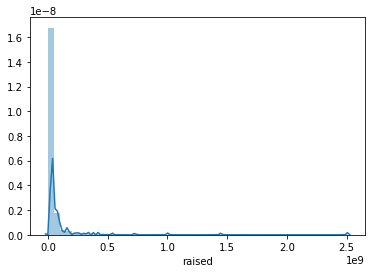

In [197]:
sns.distplot(a)

In [198]:
a.mean()

46529143.297376096

In [199]:
a.median()

9900000.0

Judging by the distribution, we can clearly see that the distribution is highly skewed so it is best to take the value of median to impute it with the null values

In [200]:
a1 = df.loc[df['raised']=='-']['raised'].index

In [202]:
df.loc[a1]['raised'] = a.median()

In [207]:
df['raised'].replace({'-':a.median()},inplace=True)

In [209]:
df['raised'] = df['raised'].apply(lambda x: int(x.replace(',','')[1:]) if type(x)==str else x)

In [210]:
df.head()

,name,desc,website,location,employees,raised,angel_url,angel_id
0,Cleargraph,Zero-friction identity verification,https://angel.co/cleargraphinc,San Francisco,1-10,9900000.0,https://cleargraph.com/careers.html,3405248
1,Kylie.ai,Kylie Leverages AI to Clone Enterprise Support...,https://angel.co/kylieai,San Francisco,1-10,9900000.0,http://www.kylie.ai,3399236
2,IFTTT,Do more with the services you love,https://angel.co/ifttt,San Francisco,11-50,37000000.0,https://ifttt.com,26564
3,CrowdFlower,The essential human-in-the-loop platform for d...,https://angel.co/crowdflower,San Francisco,51-200,38000000.0,http://www.crowdflower.com,32119
4,Ripple,"Instant, certain, low-cost cross-border payments.",https://angel.co/ripple-labs,San Francisco,51-200,86500000.0,http://www.ripple.com,197974


In [211]:
df.isnull().sum()

name         0
desc         0
website      0
location     0
employees    0
raised       0
angel_url    2
angel_id     0
dtype: int64

In [213]:
len(df['angel_url'].unique())

469

In [214]:
#There are two null values in this

In [215]:
df.loc[df['angel_url'].isnull()]

,name,desc,website,location,employees,raised,angel_url,angel_id
497,Neoteny 3,"Neoteny Co., Ltd is a venture capital firm whi...",https://angel.co/neoteny-3,Boston,1-10,9900000.0,NaN,1900230
507,Bridge Boys,Building great companies with our friends,https://angel.co/bridge-boys,Boston,1-10,9900000.0,NaN,150517


In [216]:
df.loc[497,'angel_url'] = 'https://www.neoteny.com/'
df.loc[507,'angel_url'] = 'None'

In [217]:
df.isnull().sum()

name         0
desc         0
website      0
location     0
employees    0
raised       0
angel_url    0
angel_id     0
dtype: int64

In [218]:
df.head()

,name,desc,website,location,employees,raised,angel_url,angel_id
0,Cleargraph,Zero-friction identity verification,https://angel.co/cleargraphinc,San Francisco,1-10,9900000.0,https://cleargraph.com/careers.html,3405248
1,Kylie.ai,Kylie Leverages AI to Clone Enterprise Support...,https://angel.co/kylieai,San Francisco,1-10,9900000.0,http://www.kylie.ai,3399236
2,IFTTT,Do more with the services you love,https://angel.co/ifttt,San Francisco,11-50,37000000.0,https://ifttt.com,26564
3,CrowdFlower,The essential human-in-the-loop platform for d...,https://angel.co/crowdflower,San Francisco,51-200,38000000.0,http://www.crowdflower.com,32119
4,Ripple,"Instant, certain, low-cost cross-border payments.",https://angel.co/ripple-labs,San Francisco,51-200,86500000.0,http://www.ripple.com,197974


In [219]:
df.rename(columns = {'website':'angel_url','angel_url':'website'},inplace=True)

In [220]:
df.head()

,name,desc,angel_url,location,employees,raised,website,angel_id
0,Cleargraph,Zero-friction identity verification,https://angel.co/cleargraphinc,San Francisco,1-10,9900000.0,https://cleargraph.com/careers.html,3405248
1,Kylie.ai,Kylie Leverages AI to Clone Enterprise Support...,https://angel.co/kylieai,San Francisco,1-10,9900000.0,http://www.kylie.ai,3399236
2,IFTTT,Do more with the services you love,https://angel.co/ifttt,San Francisco,11-50,37000000.0,https://ifttt.com,26564
3,CrowdFlower,The essential human-in-the-loop platform for d...,https://angel.co/crowdflower,San Francisco,51-200,38000000.0,http://www.crowdflower.com,32119
4,Ripple,"Instant, certain, low-cost cross-border payments.",https://angel.co/ripple-labs,San Francisco,51-200,86500000.0,http://www.ripple.com,197974


In [222]:
df.to_csv('Cleaned_filtered_USA_angel_list[data8].csv')